<a href="https://colab.research.google.com/github/chriswmann/uk-population-analysis/blob/master/UK_Population_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UK Population EDA

## Imports and Options <a name="importsAndOptions"></a>
Import python modules and set some Jupyter options.

In [0]:
import urllib
import json

import matplotlib
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
# Set Jupyter options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Formatting Options <a name="formattingOptions"></a>

Set a few options to make python outputs look nicer.


In [0]:
# Set python options
# Seaborn size and style
sns.set(rc={'figure.figsize':(18, 9)},
        style='white', context='talk')

# Numpy display format
float_formatter = lambda x: f'{x:,.1f}'
np.set_printoptions(formatter={'float_kind':float_formatter})

# Pandas display format
pd.options.display.float_format = '{:,.1f}'.format

# Formatting options for pandas display styles
# Set CSS properties for th elements in dataframe
th_props = [
    ('font-size', '16px'),
    ('color', '#00a1c1'),
    ('text-align', 'left'),
    ('padding', '2px 20px'),
]

# Set CSS properties for td elements in dataframe
td_props = [
    ('font-size', '16px'),
    ('padding', '2px 20px'),
]

# Set table styles
styles = [
    dict(selector="th", props=th_props),
    dict(selector="td", props=td_props),
]

my_colours = ['#00a1c1',
                  '#a94442',
                  '#3c763d',
                  '#245269',
                  '#005B88',
                  '#777777']

## Load Data <a name="loadData"></a>

Since Google Colab will delete files when the runtime is recycled, we'll read the data in directly from https://www.nomisweb.co.uk/.

In [0]:
# Load data
data_url = "https://www.nomisweb.co.uk/api/v01/dataset/NM_31_1.jsonstat.json"
data = urllib.request.urlopen(data_url).read()
data_dict = json.loads(data)

## Explore Data <a name="exploreData"></a>
Json.loads returns a dictionary, so we'll start by looking at the keys in the data.

In [5]:
for k, v in data_dict.items():
    if isinstance(v, dict):
        print(k, v.keys())
    else:
        print(k, v)

version 2.0
class dataset
label Population estimates - local authority based by five year age band
source ONS Crown Copyright Reserved
updated 2019-7-13
value [1365100, 100.0, 18300, 1.3, 70200, 5.1, 95300, 7.0, 113500, 8.3, 118700, 8.7, 102200, 7.5, 90600, 6.6, 102100, 7.5, 88600, 6.5, 79700, 5.8, 76800, 5.6, 79300, 5.8, 83800, 6.1, 73300, 5.4, 66300, 4.9, 51900, 3.8, 32600, 2.4, 15200, 1.1, 6900, 0.5, None, None, None, None, None, None, None, None, 172800, 12.7, 1448400, 100.0, 17500, 1.2, 66100, 4.6, 89800, 6.2, 108800, 7.5, 114300, 7.9, 98800, 6.8, 89900, 6.2, 100500, 6.9, 87300, 6.0, 77400, 5.3, 76300, 5.3, 80500, 5.6, 88800, 6.1, 84700, 5.8, 81200, 5.6, 72800, 5.0, 56600, 3.9, 34700, 2.4, 22400, 1.5, None, None, None, None, None, None, None, None, 267700, 18.5, 2813500, 100.0, 35900, 1.3, 136400, 4.8, 185100, 6.6, 222300, 7.9, 232900, 8.3, 200900, 7.1, 180500, 6.4, 202500, 7.2, 175900, 6.3, 157100, 5.6, 153100, 5.4, 159800, 5.7, 172600, 6.1, 158000, 5.6, 147500, 5.2, 124800, 4.4,

Next we'll take a look at some of the values for the nested items.

In [6]:
for k, v in data_dict['dimension'].items():
    print(k, v)

time {'label': 'date', 'category': {'index': {'1981': 0, '1982': 1, '1983': 2, '1984': 3, '1985': 4, '1986': 5, '1987': 6, '1988': 7, '1989': 8, '1990': 9, '1991': 10, '1992': 11, '1993': 12, '1994': 13, '1995': 14, '1996': 15, '1997': 16, '1998': 17, '1999': 18, '2000': 19, '2001': 20, '2002': 21, '2003': 22, '2004': 23, '2005': 24, '2006': 25, '2007': 26, '2008': 27, '2009': 28, '2010': 29, '2011': 30, '2012': 31, '2013': 32, '2014': 33, '2015': 34, '2016': 35, '2017': 36, '2018': 37}, 'label': {'1981': '1981', '1982': '1982', '1983': '1983', '1984': '1984', '1985': '1985', '1986': '1986', '1987': '1987', '1988': '1988', '1989': '1989', '1990': '1990', '1991': '1991', '1992': '1992', '1993': '1993', '1994': '1994', '1995': '1995', '1996': '1996', '1997': '1997', '1998': '1998', '1999': '1999', '2000': '2000', '2001': '2001', '2002': '2002', '2003': '2003', '2004': '2004', '2005': '2005', '2006': '2006', '2007': '2007', '2008': '2008', '2009': '2009', '2010': '2010', '2011': '2011', '

In [7]:
for k, v in data_dict['extension'].items():
    print(k, v)

warnings [{'status': '-', 'message': 'These figures are missing.'}, {'message': '2010 estimates for IMD deciles are not available. The latest estimates are for 2009\n'}]
contact {'name': 'Nomis', 'telephone': '+441913342680', 'uri': 'http://www.nomisweb.co.uk', 'email': 'support@nomisweb.co.uk'}
subdescription pest


We can see that:
1. The actual population numbers are in the value key.
2. The different subsets of the UK's population are defined in the *dimension* sub-dictionary:
    1. Years.
    2. Countries within the UK.
    3. Sex.
    4. Age group.
    5. 'Measures' of value and percent.
3. There are missing IMD values in the data, denoted by hyphens.  [IMD is the Index of Multiple Deprivation. (PDF)](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/464430/English_Index_of_Multiple_Deprivation_2015_-_Guidance.pdf).

Let's take a look at the population values.

In [8]:
value_df = pd.DataFrame.from_dict(data_dict['value']).apply(pd.to_numeric)
value_df.info()
value_df.describe()
value_df.head(20)
value_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 1 columns):
0    20358 non-null float64
dtypes: float64(1)
memory usage: 178.2 KB


,0
count,"20,358.0"
mean,"764,526.3"
std,"3,607,660.1"
min,0.4
25%,6.3
50%,"2,550.0"
75%,"187,575.0"
max,"59,115,800.0"


,0
0,"1,365,100.0"
1,100.0
2,"18,300.0"
3,1.3
4,"70,200.0"
5,5.1
6,"95,300.0"
7,7.0
8,"113,500.0"
9,8.3


0    2442
dtype: int64

So we have:
1. A dataframe of dimensions 22800 x 1.
2. Minimum and maximum values of 0.4 and 59,115,800 respectively.
3. A median value of just 2,550, which seems small for a dataset about the population of an entire country.
4. 2442 missing values.

Next we'll take a quick look at some plots of the *value* data, to try to understand its format.

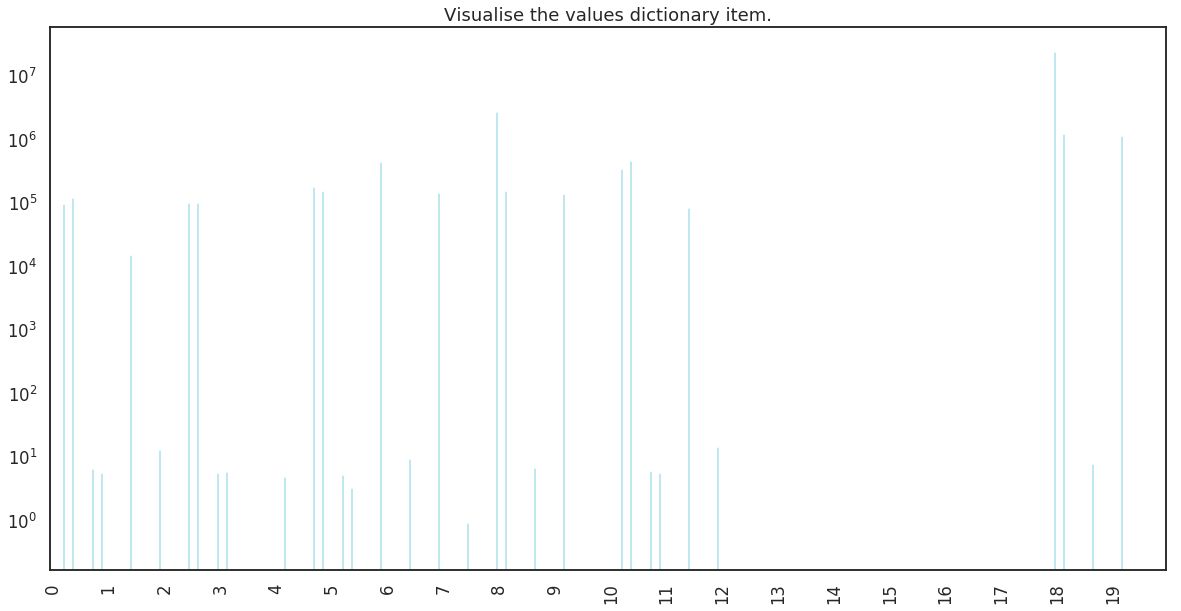

In [9]:
ax = value_df.head(500).plot.bar(logy=True,
                                 figsize=(20,10),
                                 legend=False,
                                 color=my_colours[0])
ax = ax.set(xticks=range(1, 501, 25),
            title="Visualise the values dictionary item.")

The above plot suggests that *value* may be cyclic – there appear to be pairs of values in the 10^5 range that are repeated periodically.

Next we'll take a look at the distribution of *value*.

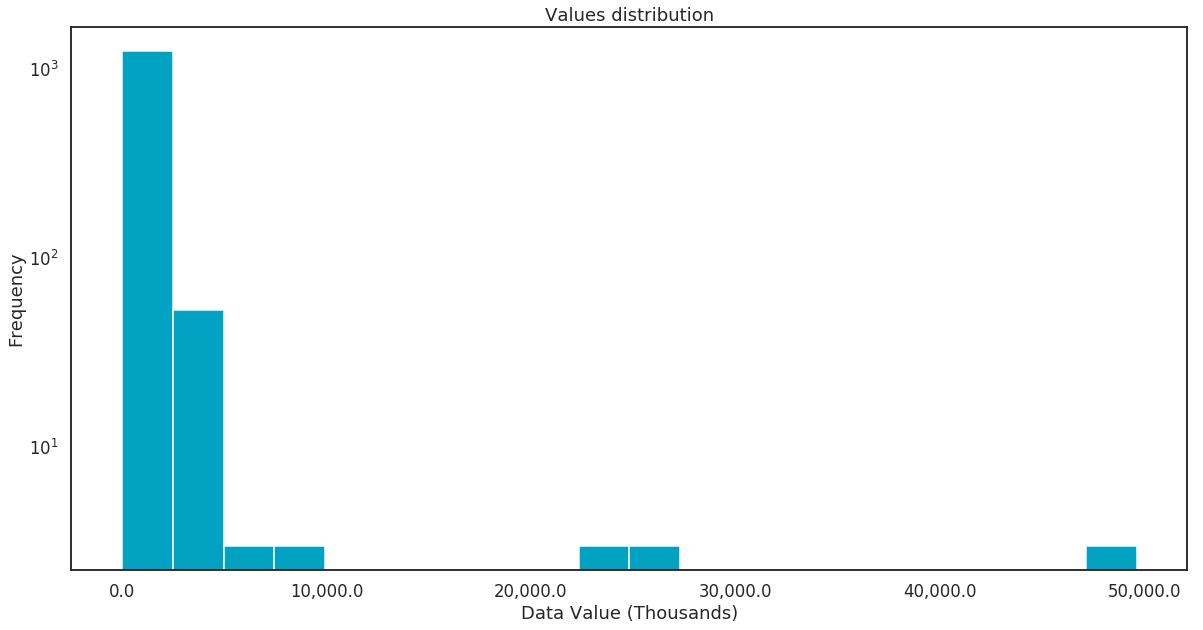

In [10]:
ax = value_df.head(2000).plot.hist(logy=True,
                                  figsize=(20,10),
                                  bins=20,
                                  legend=None,
                                  title="Values distribution",
                                  color=my_colours[0])
_ = ax.set_xlabel("Data Value (Thousands)")
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x) / 1000, ',')))

The grouping in the distribution is interesting.  As seen above, the vast majority of values are small for a dataset about an entire country's population.  We can see some data points in the 50 million range, which is close to, but slightly lower than, [the current population of the UK](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/articles/overviewoftheukpopulation/november2018).  This suggests that, as only the first 2,000 values have been used, these numbers may be for the population in the early 1980s.  The presence of population values in the 20 – 30 million range could be for different regions within the UK.

Given that the values are one-dimensional but *dimension* is specified in the original json, let's check to see if the data is a product of the dimensions that have been provided.

In [11]:
# Get the dimension IDs
id_df = pd.DataFrame.from_dict(data_dict['id'])
# Get the size of each dimension
size_df = pd.DataFrame.from_dict(data_dict['size'])
# Concatenate the dataframes and tidy them up a bit.
dimensions_df = pd.concat([id_df, size_df], axis=1)
dimensions_df.columns = ['Label', 'Size']
dimensions_df.set_index('Label', drop=True)

,Size
Label,
time,38
geography,4
sex,3
age,25
measures,2


In [12]:
value_df.shape[0] == dimensions_df.product()

Size    True
dtype: bool

This suggests that the data actually has five dimensions (the sizes of which were also confirmed by looking at the lengths of the *label* data in the json).

Let's load the data into a numpy array so we can reshape it to the above dimensions.

In [0]:
data_tensor = np.array(data_dict['value']).astype(np.float)

In [14]:
data_tensor = data_tensor.reshape(dimensions_df.Size)
data_tensor.shape

(38, 4, 3, 25, 2)

Now we have the data separated into dimensions.  At this point it would be pertinent to run a few checks (or if part of a data pipeline, write a few unit tests) to confirm that the data has been structured correctly.

For now we'll assume that's the case and instead have a look at *measures*.

In [15]:
measures_cols = data_dict['dimension']['measures']['category']['label'].values()
print(measures_cols)
# Select all years, Wales, Male, All Ages and both measures.
measures_df = pd.DataFrame(data_tensor[:, 0, 0, 0, :], columns=measures_cols)
print(measures_df.shape)
measures_df.head()

dict_values(['Value', 'Percent'])
(38, 2)


,Value,Percent
0,"1,365,100.0",100.0
1,"1,358,200.0",100.0
2,"1,357,500.0",100.0
3,"1,356,700.0",100.0
4,"1,358,000.0",100.0


As expected, we have a dataframe of 38x2 – a row per year and the value and percent columns as described in the json.

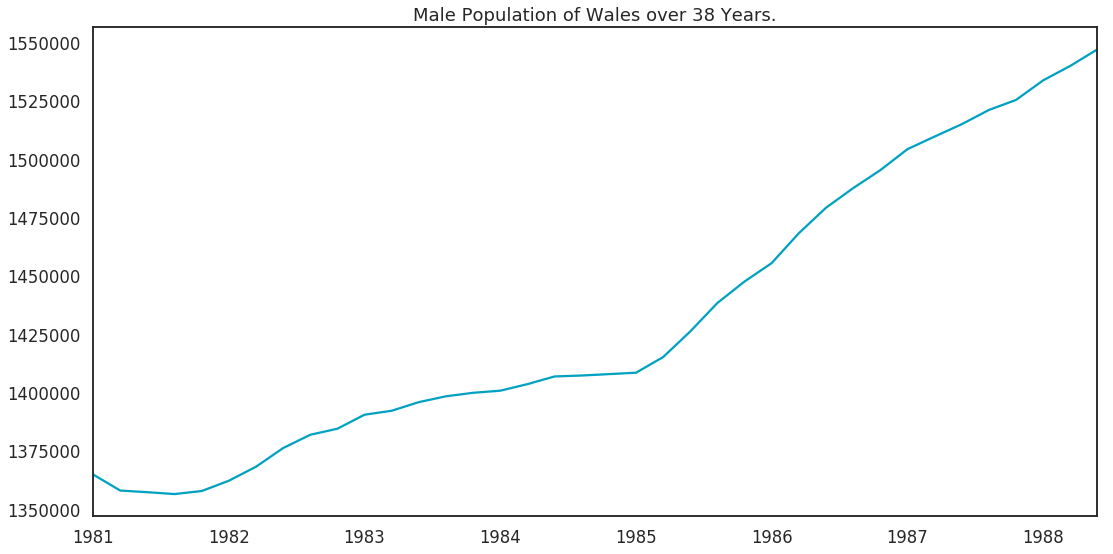

In [16]:
ax = measures_df.Value.plot.line(title="Male Population of Wales over 38 Years.",
                                color = my_colours[0],
                                legend=False)

_ = ax.set_xticklabels(range(1981, 2019))

Comparing against the information on the [Wikipedia article on the demography of Wales](https://en.wikipedia.org/wiki/Demography_of_Wales), this plot seems reasonable.  We can also see a general increase in the population over time, which is as expected.

We can take this plot as another sign that the data has been correctly parsed and structured so far.

## First Demonstration <a name="firstDemonstration"></a>

On to our first demonstration, which is a table showing the male, female and total population in columns, per UK region in rows, as well as the UK total, for the most recent year.

To create this table we'll extract the required labels from the json.

In [0]:
regions = list(data_dict['dimension']['geography']['category']['label'].values())
sexes = list(data_dict['dimension']['sex']['category']['label'].values())

Next we create a dataframe from the data matrix.  The data exploration above has shown that the *year* data is in ascending order, so taking the last element from that dimension will give us the most recent year.  We also take all of the *sex* and *geography* dimensions.

In [0]:
demo_1 = pd.DataFrame(data_tensor[-1, :, :, 0, 0].reshape(4, 3), columns=sexes)
# Add a 'UK total' row as required by the deliverable.
# Take care to not count Wales twice,
# as it's included on it's own and with England
totals = demo_1.iloc[1:, :].sum() - demo_1.iloc[0, :]
demo_1 = demo_1.append(totals, ignore_index=True)
# This if statement was just to allow me to rerun this cell conveniently.
if not 'UK Total' in regions: regions += ['UK Total']
demo_1['Regions'] = regions
demo_1 = demo_1.set_index('Regions', drop=True)

Next we do a little formatting of the dataframe display, just to make it look a bit more interesting.

In [19]:
float_cols = [c for c in demo_1.dtypes.index[demo_1.dtypes == 'float64']]
style = demo_1.style.format(dict(zip(float_cols,
                                 [lambda x: "{:10,.0f}".format(x)]*10)))
(style.set_table_styles(styles))

,Male,Female,Total
Regions,,,
Wales,"1,547,300","1,591,300","3,138,600"
Scotland,"2,648,800","2,789,300","5,438,100"
Northern Ireland,"926,200","955,400","1,881,600"
England and Wales,"29,215,300","29,900,600","59,115,800"
UK Total,"31,243,000","32,054,000","63,296,900"


In [20]:
# Check the sex numbers add up (literally)
demo_1[['Male', 'Female']].sum(axis=1) - demo_1.Total

Regions
Wales                 0.0
Scotland              0.0
Northern Ireland      0.0
England and Wales   100.0
UK Total            100.0
dtype: float64

In [21]:
demo_1.iloc[:-1, :].sum() - demo_1.iloc[-1, :]

Male     3,094,600.0
Female   3,182,600.0
Total    6,277,200.0
dtype: float64

It appears neither set of totals are correct.  The discrepancies in gender for England and Wales and the UK are of the order of 0.001% and are likely to be in the source data.  We'll ignore them for now.

A few handcalcs show that the assumption that Wales would be double-counted appears to have been wrong.  We'll correct for this by making two changes: adding the Wales population figures back in and updating the name of the *England and Wales* region to *England*.

In [22]:
totals = demo_1.iloc[:-1, :].sum()
demo_1.loc['UK Total', :] = totals
# Check the new numbers are correct.
demo_1.iloc[:-1, :].sum() == demo_1.iloc[-1, :]
demo_1 = demo_1.rename({'England and Wales': 'England'})

Male      True
Female    True
Total     True
dtype: bool

In [0]:
demo_1.to_csv('demo_1.csv')

We'll use *regions* again, so we make the correction for "England and Wales" in that too.

In [0]:
regions = ['England' if region == 'England and Wales' else region for region in regions]

## Second Demonstration <a name="secondDemonstration"></a>

The second demonstration is some EDA to show how the population progressed by regions and age groups.

We'll start by getting those labels from the json data.

In [0]:
ages = list(data_dict['dimension']['age']['category']['label'].values())
years = list(data_dict['dimension']['time']['category']['label'].values())

Tidy up the age labels a little.

In [0]:
ages = [age.replace('Aged ', '').replace(' years', '') for age in ages[0:20]]

I've chosen to maintain a [tidy data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf) structure by using a hierarchical (column) index.  We'll therefore create a *MultiIndex* to use for the dataframe first.

In [0]:
# We'll use the 'All ages' feature provided in the original data, so 
# we don't need UK Total any more.
regions.remove('UK Total')

In [0]:
region_index = [region for region in regions for age in ages]

In [0]:
age_index = len(regions) * ages

In [0]:
index = pd.MultiIndex.from_arrays([region_index, age_index],  names=['Region', 'Age'])

In [31]:
index

MultiIndex(levels=[['England', 'Northern Ireland', 'Scotland', 'Wales'], ['1 - 4', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', '5 - 9', '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 and over', 'All ages', 'under 1 year']],
           codes=[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [18, 19, 0, 9, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 9, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 9, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 9, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17]],
           names=['Region', 'Age'])

The next bit is not a very elegant solution, but it works using the following steps:
1. Take the relevant subsets of data from *data_tensor*.
2. Reshape the tensor into a (2D) matrix, create a dataframe from it and assign the *MultiIndex* to the columns.
3. Set the index to years (using integer values for now but this could easily be a datetime index – if more compex units were involved this would be preferrable.)

In [32]:
data = data_tensor[:, :, -1, 0:20, 0]
# Check the shape
data.shape

(38, 4, 20)

In [33]:
uk_pops = data.sum(axis=(1))
# Check the shape
uk_pops.shape

(38, 20)

In [0]:
new_shape = data.shape[0], data.shape[1] * data.shape[2]

In [0]:
df = pd.DataFrame(data.reshape(new_shape), columns=index)

In [36]:
# Check the dataframe
df.head(6)

Region       Wales                         ...     England                        
Age       All ages under 1 year     1 - 4  ...     75 - 79     80 - 84 85 and over
0      2,813,500.0     35,900.0 136,400.0  ... 1,523,900.0   864,500.0   540,500.0
1      2,804,300.0     34,900.0 138,600.0  ... 1,550,400.0   897,700.0   555,900.0
2      2,803,300.0     35,500.0 141,500.0  ... 1,580,000.0   933,700.0   571,500.0
3      2,800,700.0     34,800.0 143,000.0  ... 1,608,300.0   968,400.0   591,900.0
4      2,803,400.0     36,400.0 140,900.0  ... 1,627,100.0   995,600.0   618,600.0
5      2,810,900.0     36,600.0 142,700.0  ... 1,637,600.0 1,017,100.0   643,200.0

[6 rows x 80 columns]

In [0]:
df.index = [int(year) for year in years]

In [38]:
# Check the data types
print(f'Unique dtypes: {df.dtypes.unique()}\n')

# Check the data for nans
print(f'nan count per feature:\n{df.isnull().sum()[df.isnull().sum() > 0]}\n')

# For reference, print the number of elements in df
num_vals = df.shape[0] * df.shape[1]
print(f'total elements in df: {num_vals}\n')

# Count the null values in df
num_nulls = df.isnull().sum().sum()
print(f'null values in df: {num_nulls}\n')

# percentage null values
print(f'percentage null values: {(num_nulls / num_vals) * 100:3.1f}%')

Unique dtypes: [dtype('float64')]

nan count per feature:
Region            Age         
Northern Ireland  All ages        11
                  under 1 year    11
                  1 - 4           11
                  5 - 9           11
                  10 - 14         11
                  15 - 19         11
                  20 - 24         11
                  25 - 29         11
                  30 - 34         11
                  35 - 39         11
                  40 - 44         11
                  45 - 49         11
                  50 - 54         11
                  55 - 59         11
                  60 - 64         11
                  65 - 69         11
                  70 - 74         11
                  75 - 79         11
                  80 - 84         11
                  85 and over     11
dtype: int64

total elements in df: 3040

null values in df: 220

percentage null values: 7.2%


We can see that there are missing values for all ages for NI, representing just over 7% of the dataset.

In [0]:
# Create a colour map to add formatting to dataframes.
# This may help spot any patterns or outliers.
cm = sns.light_palette(my_colours[0], as_cmap=True)

In [40]:
df.describe().style.background_gradient(cmap=cm)

In [41]:
# Arbitrarily choose Scotland to have a look at.
df.Scotland.style.background_gradient(cmap=cm)

Age,All ages,under 1 year,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 and over
1981,5.1802e+06,68500,282600,347700,432700,459300,415400,355300,368400,310200,292700,290600,294700,295000,260400,248200,211400,149100,82500,48700
1982,5.1645e+06,66600,257700,327700,418600,457500,423300,362000,351900,331300,292000,288100,293300,289400,269600,239400,211300,150600,84900,49400
1983,5.1481e+06,65100,263400,314300,400900,452200,430300,368300,344000,342100,294200,288700,290200,286700,278300,227300,210500,153000,87700,50800
1984,5.1389e+06,63700,263900,310700,380600,444000,437700,377200,341200,349500,297400,289600,287100,284400,286900,216600,210100,155000,91200,52300
1985,5.1279e+06,65400,259800,310600,362300,430800,442500,386700,341500,357000,298800,289600,284300,283300,277600,223700,208800,156800,93400,55000
1986,5.1118e+06,66300,257000,313000,343200,422900,440000,394300,344400,360600,304400,286500,281600,280800,273200,230500,204300,156800,95200,56700
1987,5.099e+06,65500,256700,318700,323800,409900,437100,400700,350600,343800,325600,286000,279800,280000,268600,239700,198000,157700,97200,59700
1988,5.0774e+06,66200,256200,322000,310500,392000,429400,403100,355700,335800,336000,288000,280900,277900,267100,248000,188500,158100,99300,62600
1989,5.0782e+06,64200,260900,321700,308100,372400,421000,407700,364100,333700,344100,291900,282600,275900,266500,256800,180600,158800,101300,65800
1990,5.0813e+06,63600,261200,321500,309600,355900,412600,413000,375100,335100,352100,293600,283100,273800,266200,249400,187800,158000,102300,67400


Whilst hard to discern with confidence, there does appear to be a trend towards an ageing population in Scotland.  This makes intuitive sense given the media reports of an ageing population in the UK.  Perhaps a comparison of the change in demographics in each region over time would be interesting to look at.

At this point (and earlier) it would be pertient to perform a range of checks to validate and verify the data structure and contents.  We'll settle for some simple checks on the totals.  Firstly, we'll check the mean difference between the *All ages* value and the sum of ages for each region.

In [42]:
errors_df = pd.DataFrame()
for region in regions:
    errors = (df[region].iloc[:, 1:].sum(axis=1) - df[region]['All ages'])
    errors_mean = errors.mean()
    errors_df = pd.concat([errors_df, errors], axis=1)
errors_df.columns = regions
errors_ind = errors_df.index.tolist()
errors_ind.append('Mean')
errors_df = errors_df.append(errors_df.mean(), ignore_index=True)
errors_df.index = errors_ind
errors_df.style.background_gradient(cmap=cm)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Wales,Scotland,Northern Ireland,England
1981,-100,33200,nan,-100
1982,0,100,nan,200
1983,0,-100,nan,200
1984,-100,200,nan,100
1985,-400,0,nan,-200
1986,0,-100,nan,0
1987,100,100,nan,-100
1988,100,-100,nan,-300
1989,200,-100,nan,400
1990,200,0,nan,100


The formatting certainly makes the large discrepancy for Scotland (a difference of 33,200 in 1981) stand out.  We can again see there are missing values for NI and now we can see that they are for the first 11 years.  Other than these issues, the errors are generally very small and for our purposes can be ignored.

In [43]:
df.England.style.background_gradient(cmap=cm)

Age,All ages,under 1 year,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 and over
1981,4.96343e+07,634100,2.3715e+06,3.1963e+06,3.8887e+06,4.1297e+06,3.7437e+06,3.3715e+06,3.7149e+06,3.1853e+06,2.8107e+06,2.7228e+06,2.8089e+06,2.9013e+06,2.6067e+06,2.4899e+06,2.1293e+06,1.5239e+06,864500,540500
1982,4.95816e+07,619800,2.4417e+06,3.0309e+06,3.7862e+06,4.1485e+06,3.8201e+06,3.3774e+06,3.512e+06,3.4425e+06,2.8134e+06,2.7209e+06,2.7818e+06,2.8291e+06,2.7075e+06,2.4134e+06,2.1326e+06,1.5504e+06,897700,555900
1983,4.9617e+07,622700,2.4937e+06,2.921e+06,3.6705e+06,4.1208e+06,3.9223e+06,3.4127e+06,3.4033e+06,3.58e+06,2.8625e+06,2.7477e+06,2.748e+06,2.783e+06,2.8236e+06,2.2837e+06,2.1365e+06,1.58e+06,933700,571500
1984,4.97131e+07,622300,2.5063e+06,2.9131e+06,3.5166e+06,4.04e+06,4.0451e+06,3.488e+06,3.3567e+06,3.6439e+06,2.9442e+06,2.7809e+06,2.7092e+06,2.7479e+06,2.9164e+06,2.1718e+06,2.1422e+06,1.6083e+06,968400,591900
1985,4.98607e+07,648500,2.4967e+06,2.955e+06,3.3779e+06,3.951e+06,4.1381e+06,3.5937e+06,3.3273e+06,3.6866e+06,3.0299e+06,2.7957e+06,2.6817e+06,2.7273e+06,2.8042e+06,2.2642e+06,2.1414e+06,1.6271e+06,995600,618600
1986,4.99986e+07,654300,2.5224e+06,3.017e+06,3.2092e+06,3.8894e+06,4.1711e+06,3.7132e+06,3.3384e+06,3.6984e+06,3.1573e+06,2.7673e+06,2.6634e+06,2.7051e+06,2.7246e+06,2.3549e+06,2.1147e+06,1.6376e+06,1.0171e+06,643200
1987,5.0123e+07,663500,2.5555e+06,3.0895e+06,3.0552e+06,3.7988e+06,4.1727e+06,3.8281e+06,3.379e+06,3.5149e+06,3.4247e+06,2.774e+06,2.6626e+06,2.6803e+06,2.6584e+06,2.4516e+06,2.0514e+06,1.6493e+06,1.0414e+06,672000
1988,5.02536e+07,684600,2.5937e+06,3.1519e+06,2.952e+06,3.6894e+06,4.1277e+06,3.9314e+06,3.4284e+06,3.4117e+06,3.5676e+06,2.8251e+06,2.6907e+06,2.6499e+06,2.6173e+06,2.5587e+06,1.9451e+06,1.6601e+06,1.067e+06,701000
1989,5.04078e+07,678800,2.6561e+06,3.1641e+06,2.9443e+06,3.5439e+06,4.0642e+06,4.0374e+06,3.4955e+06,3.3612e+06,3.6288e+06,2.9086e+06,2.7242e+06,2.6165e+06,2.5873e+06,2.6439e+06,1.8533e+06,1.6744e+06,1.0928e+06,732900
1990,5.05606e+07,683900,2.6823e+06,3.1793e+06,2.9839e+06,3.4117e+06,3.9777e+06,4.1241e+06,3.5921e+06,3.3301e+06,3.6697e+06,2.9941e+06,2.7383e+06,2.5901e+06,2.5703e+06,2.5435e+06,1.9444e+06,1.68e+06,1.108e+06,757200


We could see in the plot of Welsh male population above that there appeared to be a dip in that demographic in the early 80s.  Let's take a look at the population of the entire UK.

First we select the 'All ages' feature for each region and 

In [0]:
total_pop = df.xs(key='All ages', axis=1, level='Age')
total_pop = total_pop.reset_index()

In [45]:
total_pop.head()

Region,index,Wales,Scotland,Northern Ireland,England
0,1981,"2,813,500.0","5,180,200.0",nan,"49,634,300.0"
1,1982,"2,804,300.0","5,164,500.0",nan,"49,581,600.0"
2,1983,"2,803,300.0","5,148,100.0",nan,"49,617,000.0"
3,1984,"2,800,700.0","5,138,900.0",nan,"49,713,100.0"
4,1985,"2,803,400.0","5,127,900.0",nan,"49,860,700.0"


In [46]:
total_pop.columns = ['Year'] + regions.copy()
total_pop['Year'] = total_pop['Year'].astype(int)
total_pop.head()

,Year,Wales,Scotland,Northern Ireland,England
0,1981,"2,813,500.0","5,180,200.0",nan,"49,634,300.0"
1,1982,"2,804,300.0","5,164,500.0",nan,"49,581,600.0"
2,1983,"2,803,300.0","5,148,100.0",nan,"49,617,000.0"
3,1984,"2,800,700.0","5,138,900.0",nan,"49,713,100.0"
4,1985,"2,803,400.0","5,127,900.0",nan,"49,860,700.0"


In [0]:
def normalise_populations(s):
    '''Utility function to normalise population columns.
    '''
    
    if s.dtype == np.int64:
        # This is the year column!
        return s
    else:
        return s / s.max()

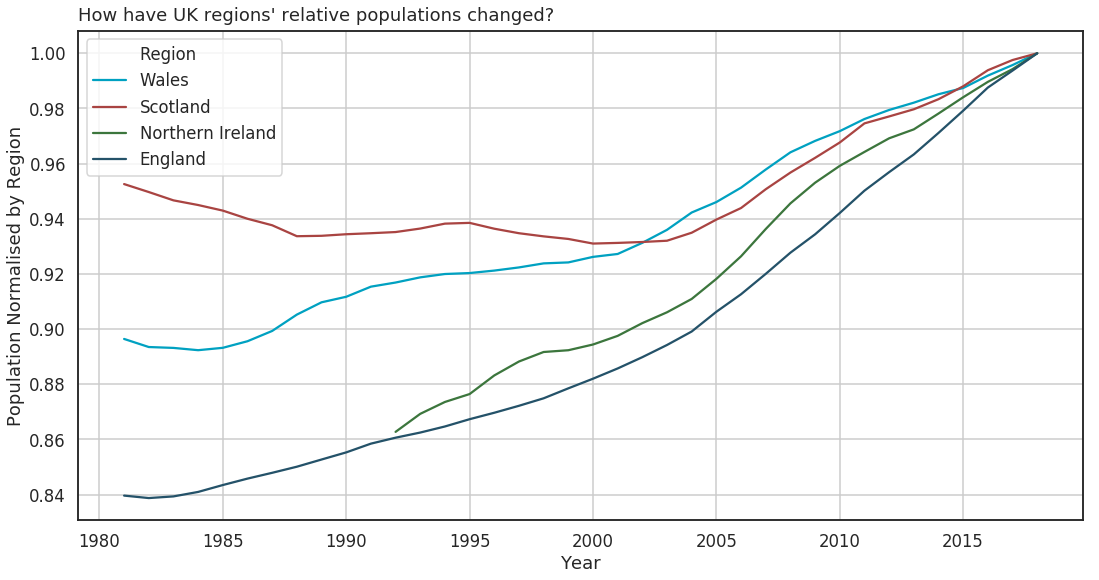

In [48]:
palette = sns.color_palette(my_colours)

fig, ax = plt.subplots(1)
df_norm = total_pop.apply(normalise_populations)

melted_norm_df = pd.melt(df_norm, id_vars='Year', var_name='Region', value_name='Population')


ax = sns.lineplot(x='Year',
                  y='Population',
                  hue='Region',
                  data=melted_norm_df,
                  palette=palette[:-2],
                  ax=ax)
ax.grid()

_ = ax.set(ylabel='Population Normalised by Region')
_ = plt.title("How have UK regions' relative populations changed?",
              loc='Left',
              pad=10.0)
plt.savefig('uk_rel_pop_change.svg')

In [49]:
format_string = '{:19}{:18}{:24}{:30}'
print(format_string.format('Region', 'Percent Change', 'Population Vs England', 'Change Vs Relative Size'))
eng_pop = total_pop['England'].max()
for col in total_pop.columns[1:]:
    pct_change = (total_pop.loc[37, col] - total_pop.loc[11, col]) / total_pop.loc[11, col]
    pop_vs_eng = total_pop.loc[37, col]/eng_pop
    change_rel_size = pct_change / pop_vs_eng
    print(f'{col:19}{pct_change:<18.0%}{pop_vs_eng:<24.0%}{change_rel_size:<.0%}')

Region             Percent Change    Population Vs England   Change Vs Relative Size       
Wales              9%                5%                      171%
Scotland           7%                9%                      75%
Northern Ireland   16%               3%                      500%
England            16%               100%                    16%


In [50]:
uk_age_groups = df.groupby(level='Age', axis=1).sum()
cols = uk_age_groups.columns.to_list()
new_cols = ages[1:]
uk_age_groups = uk_age_groups[new_cols] / 1e3
uk_age_groups.columns = ['<1'] + new_cols[1:-1] + ['>85']
uk_age_groups = uk_age_groups.rename_axis('Year').reset_index()
uk_age_groups.head()

,Year,<1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,>85
0,1981,738.5,"2,790.5","3,729.1","4,543.7","4,821.9","4,360.0","3,907.3","4,285.8","3,671.4","3,260.5","3,166.5","3,263.4","3,368.9","3,025.1","2,885.6","2,465.5","1,762.1",996.8,618.4
1,1982,721.3,"2,838.0","3,534.8","4,421.8","4,839.1","4,451.0","3,917.2","4,055.7","3,960.6","3,264.1","3,161.8","3,231.9","3,286.4","3,140.1","2,796.6","2,469.1","1,791.4","1,034.1",635.7
2,1983,723.3,"2,898.6","3,404.1","4,282.6","4,804.2","4,569.7","3,957.8","3,932.4","4,116.0","3,318.1","3,190.1","3,193.3","3,234.0","3,269.4","2,649.2","2,472.4","1,824.7","1,074.9",653.7
3,1984,720.8,"2,913.2","3,390.3","4,099.1","4,708.7","4,704.8","4,044.3","3,879.3","4,191.0","3,407.3","3,225.7","3,150.0","3,193.2","3,375.9","2,522.4","2,478.1","1,856.7","1,115.1",677.0
4,1985,750.3,"2,897.4","3,434.7","3,934.8","4,600.0","4,804.2","4,165.1","3,846.4","4,244.4","3,498.7","3,241.3","3,118.5","3,169.2","3,250.2","2,627.2","2,476.3","1,878.4","1,146.5",707.8


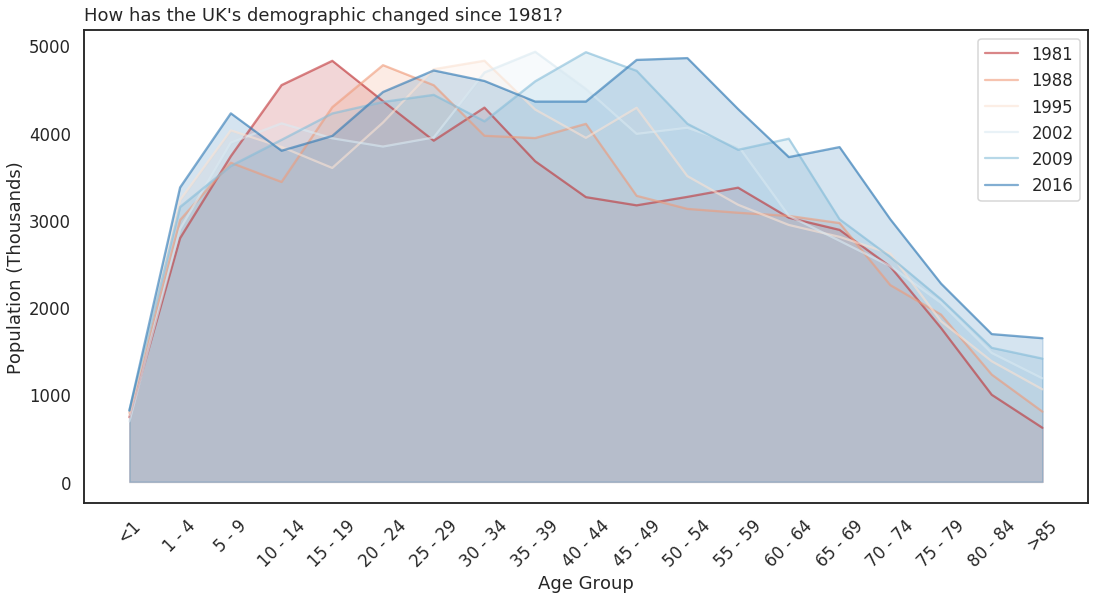

In [51]:
fig, ax = plt.subplots(1)
palette = sns.color_palette("RdBu", 6)
palette = palette.as_hex()
x = np.arange(19)
for ind, year in enumerate(range(0, len(uk_age_groups.index), 7)):
    y = uk_age_groups.iloc[year, 1:]
    _ = plt.fill_between(x, y, color=palette[ind], alpha=0.2)
    _ = plt.plot(x, y, color=palette[ind], alpha=0.6)


_ = plt.legend(labels=range(1981, 2019, 7))
_ = plt.title("How has the UK's demographic changed since 1981?",
              loc='Left',
              pad=10)

_ = ax.xaxis.set_ticks(x)
_ = ax.set_xticklabels(labels=uk_age_groups.columns[1:], rotation=45)
_ = ax.set_xlabel('Age Group')
_ = ax.set_ylabel('Population (Thousands)')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('uk_demog.svg')

In [52]:
reg_ind = [region for region in regions for sex in sexes]
sex_ind = [sex for sex in sexes for region in regions]
mult_ind = pd.MultiIndex.from_arrays([reg_ind, sex_ind, list(range(len(sex_ind)))])
mult_ind

MultiIndex(levels=[['England', 'Northern Ireland', 'Scotland', 'Wales'], ['Female', 'Male', 'Total'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           codes=[[3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [0]:
sex_ind = ['M' if sex == 'Male' else sex for sex in sexes]
sex_ind = ['F' if sex == 'Female' else sex for sex in sex_ind]
regions = ['NI' if region == 'Northern Ireland' else region for region in regions]
regions = ['Scot' if region == 'Scotland' else region for region in regions]
regions = ['Eng' if region == 'England' else region for region in regions]

In [54]:
df = pd.DataFrame()

for ind, reg in enumerate([reg for reg in regions]):
    _ = data_tensor[:, ind, :-1, 0, 0].reshape(38, 2)
    _ = pd.DataFrame(_)
    _.columns = [f'{reg} {sex}' for sex in ['M', 'F']]
    df = pd.concat([df, _], axis=1)
df['Year'] = [int(year) for year in years]
df.head()

,Wales M,Wales F,Scot M,Scot F,NI M,NI F,Eng M,Eng F,Year
0,"1,365,100.0","1,448,400.0","2,494,900.0","2,685,300.0",nan,nan,"24,160,100.0","25,474,200.0",1981
1,"1,358,200.0","1,446,100.0","2,487,300.0","2,677,200.0",nan,nan,"24,119,500.0","25,462,100.0",1982
2,"1,357,500.0","1,445,800.0","2,479,100.0","2,669,000.0",nan,nan,"24,133,300.0","25,483,700.0",1983
3,"1,356,700.0","1,444,000.0","2,474,600.0","2,664,300.0",nan,nan,"24,184,700.0","25,528,400.0",1984
4,"1,358,000.0","1,445,300.0","2,469,500.0","2,658,400.0",nan,nan,"24,254,300.0","25,606,400.0",1985


In [0]:
eng_melt = pd.melt(df.iloc[:, -3:], id_vars=['Year'], var_name='Gender', value_name='Population')
eng_melt['Population'] = eng_melt['Population'] / eng_melt['Population'].max()
mapper = {
    'Eng M': 'Male',
    'Eng F': 'Female',
}
eng_melt['Gender'] = eng_melt['Gender'].map(mapper)

In [0]:
male_pop = eng_melt[eng_melt.Gender == 'Male'].Population
female_pop = eng_melt[eng_melt.Gender == 'Female'].Population
years = pd.Series(eng_melt.Year.unique())

In [0]:
lines = list(zip(list(zip(years,
                          male_pop)),
                 list(zip(years,
                          female_pop))))

In [0]:
colours = [(0.7,
            0.2 + 4.5 * np.sqrt(ind) / len(lines),
            0.2 + 4.5 * np.sqrt(ind) / len(lines)) for ind, line in enumerate(lines)]

linewidths = [2 for line in lines]

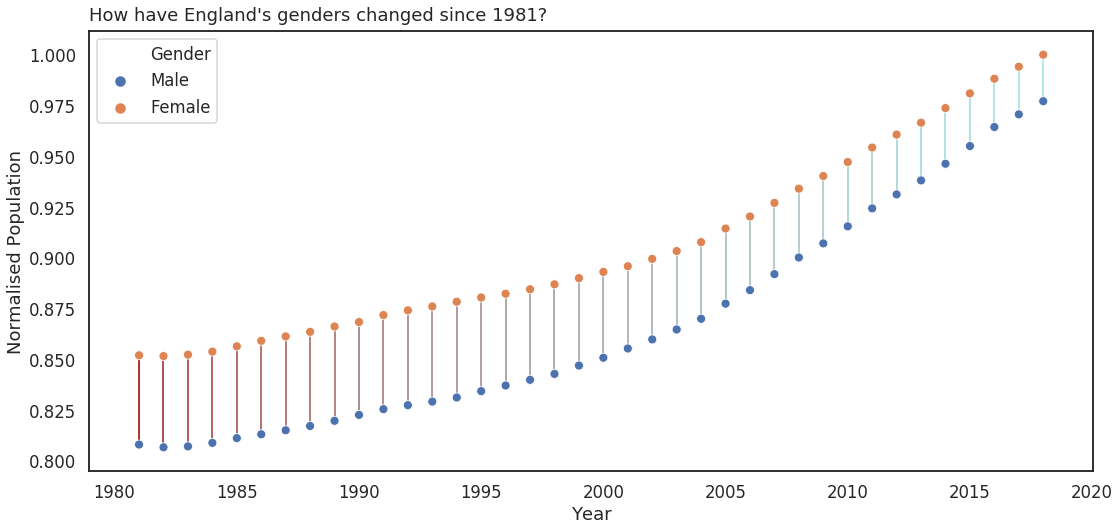

In [59]:
fig, ax = plt.subplots()


lc = LineCollection(lines,
                    linewidths=linewidths,
                    colors=colours)

_ = ax.add_collection(lc)

ax = sns.scatterplot(x='Year', y='Population',
                     hue='Gender',
                     data=eng_melt,
                     ax=ax,
                     zorder=10)


_ = ax.set(ylabel='Normalised Population')

_ = ax.set_title("How have England's genders changed since 1981?",
                 loc='left', pad=10)

plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('norm_gender.svg')

## Additional Plots and Analysis <a name="Additional"></a>

Additional plots and analysis performed during EDA which are not explored further at this time.

In [0]:
df = pd.DataFrame()
for ind, year in enumerate([int(year) for year in years]):
    _ = data_tensor[ind, :, :, 0, 0].reshape(12)
    _ = pd.Series(_)
    df = pd.concat([df, _], axis=1)
df = df.T
df.columns = [f'{region} {sex}' for region in regions for sex in sex_ind]
df = df.reset_index(drop=True)
df['Year'] = years

In [0]:
df.iloc[:, :-1] = df.iloc[:, :-1].astype(np.float)
df['Year'] = df.Year.astype(np.int)

In [62]:
df = df.apply(normalise_populations)
df.head()

,Wales M,Wales F,Wales Total,Scot M,Scot F,Scot Total,NI M,NI F,NI Total,Eng M,Eng F,Eng Total,Year
0,0.9,0.9,0.9,0.9,1.0,1.0,nan,nan,nan,0.8,0.9,0.8,1981
1,0.9,0.9,0.9,0.9,1.0,0.9,nan,nan,nan,0.8,0.9,0.8,1982
2,0.9,0.9,0.9,0.9,1.0,0.9,nan,nan,nan,0.8,0.9,0.8,1983
3,0.9,0.9,0.9,0.9,1.0,0.9,nan,nan,nan,0.8,0.9,0.8,1984
4,0.9,0.9,0.9,0.9,1.0,0.9,nan,nan,nan,0.8,0.9,0.8,1985


In [63]:
melt = pd.melt(df, id_vars='Year', var_name='Group', value_name='Population')
melt.head()

,Year,Group,Population
0,1981,Wales M,0.9
1,1982,Wales M,0.9
2,1983,Wales M,0.9
3,1984,Wales M,0.9
4,1985,Wales M,0.9


In [64]:
reg_ind = [region for region in regions for sex in sexes]
sex_ind = [sex for sex in sexes for region in regions]
mult_ind = pd.MultiIndex.from_arrays([reg_ind, sex_ind, list(range(len(sex_ind)))])
mult_ind

MultiIndex(levels=[['Eng', 'NI', 'Scot', 'Wales'], ['Female', 'Male', 'Total'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           codes=[[3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [0]:
sex_ind = ['M' if sex == 'Male' else sex for sex in sexes]
sex_ind = ['F' if sex == 'Female' else sex for sex in sex_ind]
regions = ['NI' if region == 'Northern Ireland' else region for region in regions]
regions = ['Scot' if region == 'Scotland' else region for region in regions]
regions = ['Eng' if region == 'England' else region for region in regions]

In [66]:
df = pd.DataFrame()

for ind, reg in enumerate([reg for reg in regions]):
    _ = data_tensor[:, ind, :-1, 0, 0].reshape(38, 2)
    _ = pd.DataFrame(_)
    _.columns = [f'{reg} {sex}' for sex in ['M', 'F']]
    df = pd.concat([df, _], axis=1)
df['Year'] = [int(year) for year in years]
df.head()

,Wales M,Wales F,Scot M,Scot F,NI M,NI F,Eng M,Eng F,Year
0,"1,365,100.0","1,448,400.0","2,494,900.0","2,685,300.0",nan,nan,"24,160,100.0","25,474,200.0",1981
1,"1,358,200.0","1,446,100.0","2,487,300.0","2,677,200.0",nan,nan,"24,119,500.0","25,462,100.0",1982
2,"1,357,500.0","1,445,800.0","2,479,100.0","2,669,000.0",nan,nan,"24,133,300.0","25,483,700.0",1983
3,"1,356,700.0","1,444,000.0","2,474,600.0","2,664,300.0",nan,nan,"24,184,700.0","25,528,400.0",1984
4,"1,358,000.0","1,445,300.0","2,469,500.0","2,658,400.0",nan,nan,"24,254,300.0","25,606,400.0",1985


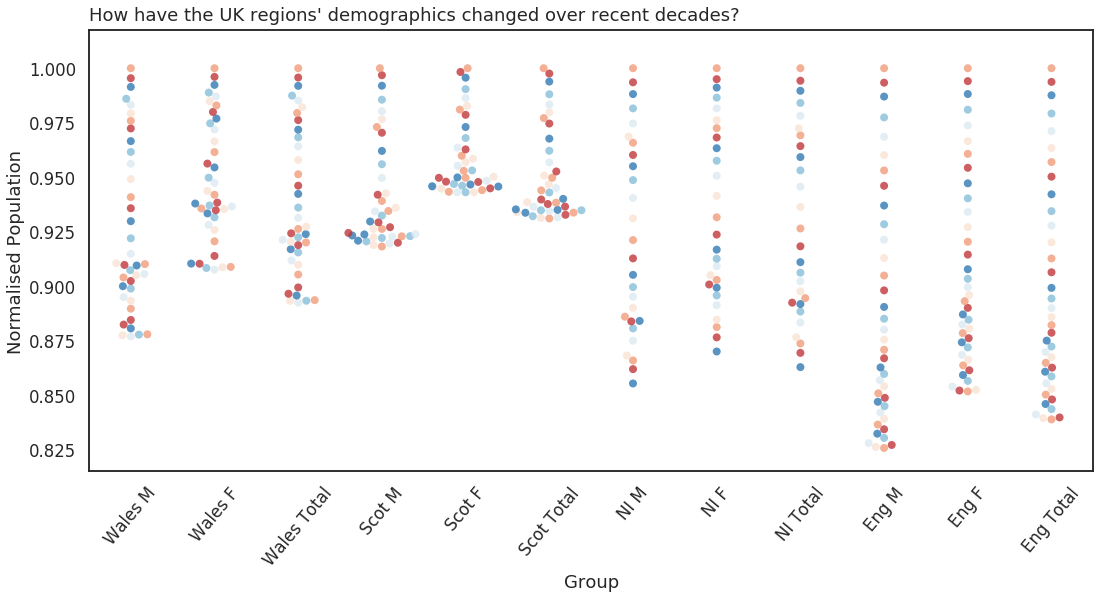

In [67]:
fig, ax = plt.subplots()
ax = sns.swarmplot(x='Group', y='Population', hue='Year',
                   palette=palette, data=melt,
                   size=8, alpha=0.8, ax=ax)

_ = ax.get_legend().remove()
_ = ax.set(ylabel='Normalised Population')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
_ = ax.set_title("How have the UK regions' demographics changed over recent decades?",
                 loc='left', pad=10)

plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('reg_demog_decades.svg')